In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
oe = OrdinalEncoder()
oe.fit(df[['Species']])
df[['Species']] = oe.transform(df[['Species']])

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0


In [8]:
df['Species'].nunique()

3

In [9]:
df.drop('Id',inplace=True,axis=1)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit(df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
no = np.argmax(cumsum >= 0.98) + 1

In [13]:
cumsum

array([0.92264045, 0.97074456, 0.98904419, 0.99604505, 1.        ])

In [14]:
list(range(1,len(cumsum)+1))

[1, 2, 3, 4, 5]

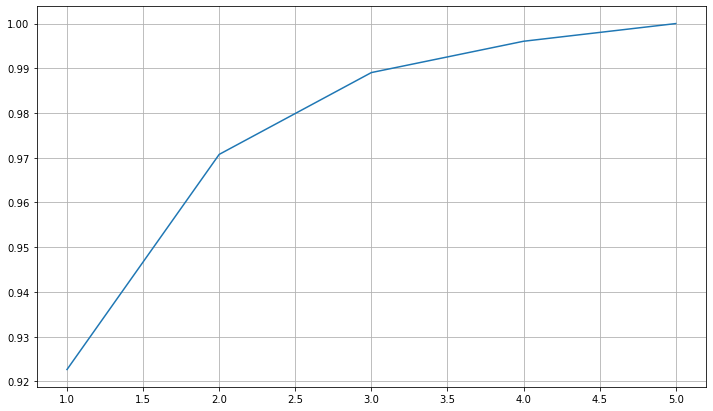

In [24]:
## plottting the cumsum with the number of dimensions tried
plt.figure(figsize=(12,7))
plt.plot(list(range(1,len(cumsum)+1)),cumsum)
ply
plt.grid(True)

**Since we are getting almost 97 percent of information with just 2 components, we will reduce the dimesionality of the dataset to 2**

In [19]:
pca_final = PCA(n_components=2)
pca_final.fit(df)
df = pca_final.transform(df)

In [20]:
df = pd.DataFrame(df,columns=['Component1','Component2'])

In [21]:
df

,Component1,Component2
0,-2.865507,0.302780
1,-2.893213,-0.176987
2,-3.055749,-0.168006
3,-2.921249,-0.325027
4,-2.906751,0.302333
...,...,...
145,2.173019,0.127024
146,1.783549,-0.443428
147,2.005057,0.009767
148,2.134714,0.036622
